# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = f"{url}appid={weather_api_key}&q="

Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date =[]
newcities = []
num = 1
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        Lat.append(response["coord"]['lat'])
        Lng.append(response["coord"]['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        print(f"Processing Record {num} | {city}")
        newcities.append(city)
        num+=1
    except KeyError:
        print("City not found. Skipping...")
        

Processing Record 1 | duobao
Processing Record 2 | east london
Processing Record 3 | broken hill
Processing Record 4 | bredasdorp
Processing Record 5 | ishigaki
Processing Record 6 | ushuaia
Processing Record 7 | punta arenas
Processing Record 8 | mount isa
City not found. Skipping...
Processing Record 9 | mar del plata
Processing Record 10 | belyy yar
Processing Record 11 | poum
Processing Record 12 | sioux lookout
Processing Record 13 | lorengau
Processing Record 14 | gravdal
Processing Record 15 | carnarvon
Processing Record 16 | nikolskoye
City not found. Skipping...
Processing Record 17 | chuy
Processing Record 18 | fairbanks
Processing Record 19 | vizinga
Processing Record 20 | busselton
Processing Record 21 | aripuana
Processing Record 22 | barrow
Processing Record 23 | indramayu
Processing Record 24 | rikitea
Processing Record 25 | norrkoping
City not found. Skipping...
Processing Record 26 | grindavik
City not found. Skipping...
Processing Record 27 | ilulissat
Processing Reco

Processing Record 233 | linhares
Processing Record 234 | hokitika
Processing Record 235 | lavrentiya
Processing Record 236 | leningradskiy
Processing Record 237 | porto novo
Processing Record 238 | kirakira
Processing Record 239 | batagay-alyta
Processing Record 240 | naze
Processing Record 241 | oltu
Processing Record 242 | vestmanna
Processing Record 243 | khatanga
Processing Record 244 | lompoc
Processing Record 245 | gagra
Processing Record 246 | belmonte
Processing Record 247 | mayor pablo lagerenza
Processing Record 248 | synya
Processing Record 249 | hithadhoo
Processing Record 250 | san joaquin
City not found. Skipping...
Processing Record 251 | port lincoln
Processing Record 252 | baykit
Processing Record 253 | zonguldak
Processing Record 254 | tuatapere
Processing Record 255 | calella
Processing Record 256 | kisangani
Processing Record 257 | vestmannaeyjar
Processing Record 258 | matamoros
Processing Record 259 | onokhoy
Processing Record 260 | kysyl-syr
Processing Record 261

Processing Record 466 | ballina
Processing Record 467 | svetlogorsk
Processing Record 468 | ossora
Processing Record 469 | rocha
City not found. Skipping...
Processing Record 470 | brindisi
Processing Record 471 | broome
Processing Record 472 | champerico
Processing Record 473 | christchurch
Processing Record 474 | gaoua
Processing Record 475 | yuza
Processing Record 476 | houma
Processing Record 477 | ushtobe
Processing Record 478 | nizhniy ingash
Processing Record 479 | sainte-maxime
Processing Record 480 | harbour breton
Processing Record 481 | ashta
Processing Record 482 | saint-gaudens
Processing Record 483 | amboasary
Processing Record 484 | boyle
Processing Record 485 | nelson bay
City not found. Skipping...
Processing Record 486 | vila velha
Processing Record 487 | bandarbeyla
Processing Record 488 | chekhov
Processing Record 489 | szakoly
Processing Record 490 | youkounkoun
City not found. Skipping...
Processing Record 491 | lao cai
Processing Record 492 | arbagar
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
City_df = pd.DataFrame({"City":newcities,"Lat":Lat, "Lng":Lng,"Max Temp":Max_Temp,"Humidity":Humidity,"Cloudiness":Cloudiness,
                       "Wind Speed":Wind_Speed,"Country":Country,"Date":Date})

In [5]:
City_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [6]:
City_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,duobao,30.67,112.69,300.37,78,100,5.49,CN,1595744201
1,east london,-33.02,27.91,288.15,72,0,6.70,ZA,1595744201
2,broken hill,-31.95,141.43,290.15,36,0,7.20,AU,1595744202
3,bredasdorp,-34.53,20.04,286.15,87,72,3.10,ZA,1595744202
4,ishigaki,24.34,124.16,302.15,83,75,5.10,JP,1595744202


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
City_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,5.900000e+02
mean,20.809763,19.580915,294.336525,69.808475,49.947458,3.610322,1.595744e+09
std,32.919065,88.122507,7.692379,21.143995,38.349863,2.372355,7.668801e+01
min,-54.800000,-179.170000,272.150000,3.000000,0.000000,0.100000,1.595744e+09
25%,-6.220000,-54.957500,289.157500,58.250000,7.000000,1.872500,1.595744e+09
50%,24.910000,20.785000,295.150000,74.000000,53.000000,3.100000,1.595744e+09
75%,47.815000,98.217500,300.150000,87.000000,90.000000,5.100000,1.595744e+09
max,78.220000,179.320000,313.660000,100.000000,100.000000,12.000000,1.595744e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
H_index = City_df.index[City_df["Humidity"]>100]

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = City_df.drop(H_index)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,duobao,30.67,112.69,300.37,78,100,5.49,CN,1595744201
1,east london,-33.02,27.91,288.15,72,0,6.70,ZA,1595744201
2,broken hill,-31.95,141.43,290.15,36,0,7.20,AU,1595744202
3,bredasdorp,-34.53,20.04,286.15,87,72,3.10,ZA,1595744202
4,ishigaki,24.34,124.16,302.15,83,75,5.10,JP,1595744202


In [10]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
clean_city_data.to_csv("../output_data/city_weather.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [64]:
date = str(pd.Timestamp(clean_city_data.loc[2,"Date"],unit='s'))[0:10]

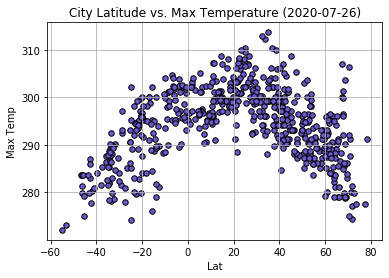

In [83]:
clean_city_data.plot(kind="scatter",x="Lat",y="Max Temp",color = "SlateBlue",grid=True,edgecolors='Black',s=30)
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.show()

## Latitude vs. Humidity Plot

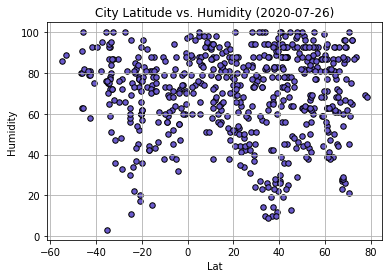

In [82]:
clean_city_data.plot(kind="scatter",x="Lat",y="Humidity",color = "SlateBlue",grid=True,edgecolors='Black',s=30)
plt.title(f"City Latitude vs. Humidity ({date})")
plt.show()

## Latitude vs. Cloudiness Plot

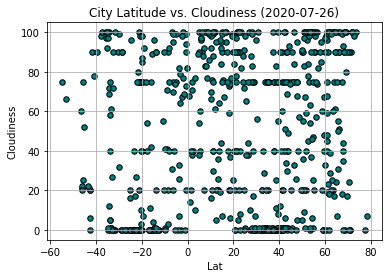

In [79]:
clean_city_data.plot(kind="scatter",x="Lat",y="Cloudiness",color = "Teal",grid=True,edgecolors='Black',s=30)
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.show()

## Latitude vs. Wind Speed Plot

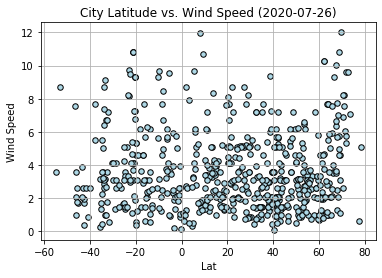

In [78]:
clean_city_data.plot(kind="scatter",x="Lat",y="Wind Speed", color = "LightBlue",grid=True,edgecolors='Black',s=30)
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.show()

## Linear Regression

In [40]:
# OPTIONAL: Create a function to create Linear Regression plots
def Linear_Re(df, x, y):
    x_value = df[x]
    y_value = df[y]
    correlation = st.pearsonr(x_value,y_value)
    print(f"The correlation between {x} and {y} is {round(correlation[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr)=st.linregress(x_value,y_value)
    regress_value = x_value*slope+intercept
    plt.scatter(x_value,y_value)
    plt.plot(x_value, regress_value, "r-")
    line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"
    plt.annotate(line_eq,(min(x_value),min(y_value)),fontsize=15,color="red")
    plt.xlabel(x)
    plt.ylabel(y)
    return plt.show()

In [16]:
# Create Northern and Southern Hemisphere DataFrames
Northern = clean_city_data.loc[(clean_city_data["Lat"]>= 0)]
Southern = clean_city_data.loc[(clean_city_data["Lat"]<0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


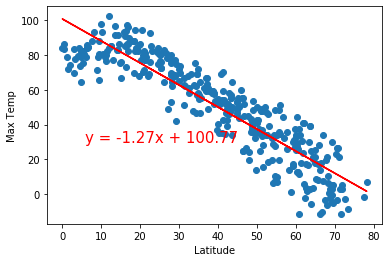

The correlation between Lat and Max Temp is -0.61


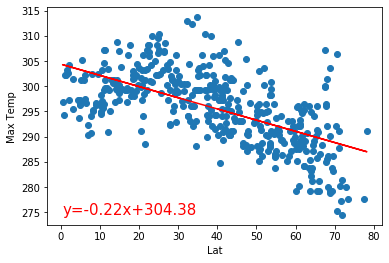

In [41]:
Linear_Re(Northern, "Lat", "Max Temp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Lat and Max Temp is 0.71


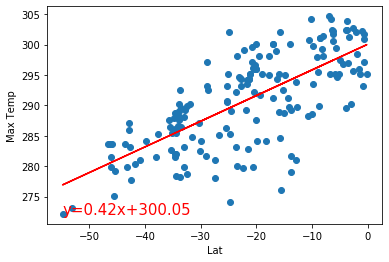

In [42]:
Linear_Re(Southern, "Lat", "Max Temp")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Lat and Humidity is -0.08


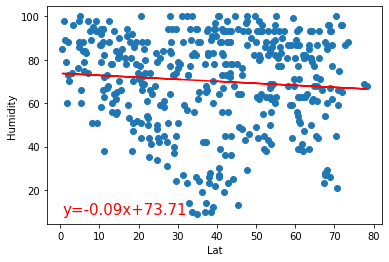

In [43]:
Linear_Re(Northern, "Lat", "Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Lat and Humidity is -0.2


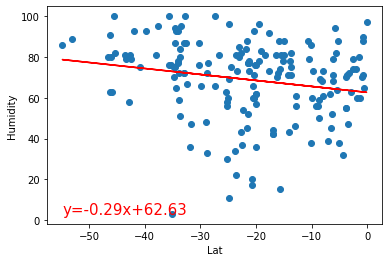

In [45]:
Linear_Re(Southern, "Lat", "Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Lat and Cloudiness is 0.0


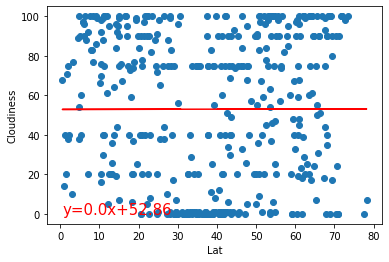

In [46]:
Linear_Re(Northern, "Lat", "Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Lat and Cloudiness is 0.08


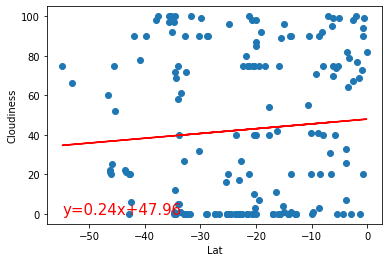

In [47]:
Linear_Re(Southern, "Lat", "Cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Lat and Wind Speed is 0.1


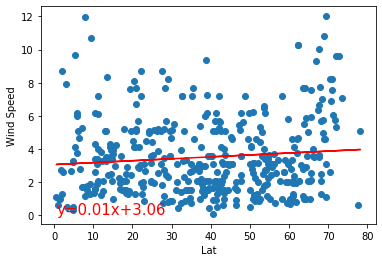

In [49]:
Linear_Re(Northern, "Lat", "Wind Speed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Lat and Wind Speed is 0.0


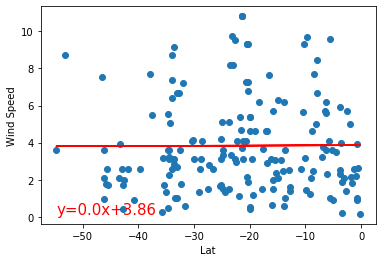

In [50]:
Linear_Re(Southern, "Lat", "Wind Speed")